In [ ]:
from vis.utils import utils
from keras import activations
from vis.visualization import visualize_activation, visualize_cam
from keras.preprocessing import image

In [ ]:
loaded_model = load_model(os.path.join('saved_models', 'transfer_learning_culture2', 'transfer_learning_culture2.h5'))

In [ ]:
loaded_model.summary()

In [ ]:
layer_idx = utils.find_layer_idx(loaded_model, 'dense_6')
loaded_model.layers[-1].activation = activations.linear
loaded_model.save('tmp/tmp.h5')
loaded_model = load_model('tmp/tmp.h5')

In [ ]:
layer_idx = utils.find_layer_idx(loaded_model, 'dense_6')
loaded_model.layers[-1].activation = activations.linear
loaded_model.save('tmp/tmp.h5')
loaded_model = load_model('tmp/tmp.h5')

In [ ]:
numpy_image = image.img_to_array(img)
grads = visualize_cam(loaded_model, layer_idx, filter_indices=0, seed_input=numpy_image, backprop_modifier='guided')

In [20]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import os
import rasterio
import numpy as np
from IAdeforestation.preprocessing import *


In [7]:
loaded_model = load_model(os.path.join('saved_models', 'transfer_learning_culture2', 'transfer_learning_culture2.h5'))

In [8]:
loaded_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 13)] 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 70, 70, 13)   0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 32, 32, 64)   40768       zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 32, 32, 64)   256         conv1/conv[0][0]                 
____________________________________________________________________________________________

                                                                 conv5_block14_2_conv[0][0]       
__________________________________________________________________________________________________
conv5_block15_0_bn (BatchNormal (None, 2, 2, 1344)   5376        conv5_block14_concat[0][0]       
__________________________________________________________________________________________________
conv5_block15_0_relu (Activatio (None, 2, 2, 1344)   0           conv5_block15_0_bn[0][0]         
__________________________________________________________________________________________________
conv5_block15_1_conv (Conv2D)   (None, 2, 2, 128)    172032      conv5_block15_0_relu[0][0]       
__________________________________________________________________________________________________
conv5_block15_1_bn (BatchNormal (None, 2, 2, 128)    512         conv5_block15_1_conv[0][0]       
__________________________________________________________________________________________________
conv5_bloc

In [16]:
eurosat_mean = [1353.036, 1116.468, 1041.475, 945.344, 1198.498, 2004.878, 2376.699, 2303.738, 732.957, 12.092, 1818.820, 1116.271, 2602.579]
eurosat_std = [65.479, 154.008, 187.997, 278.508, 228.122, 356.598, 456.035, 531.570, 98.947, 1.188, 378.993, 303.851, 503.181]

<Figure size 432x288 with 0 Axes>

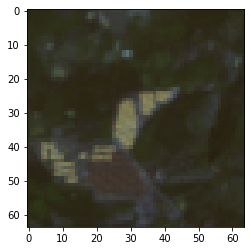

<Figure size 432x288 with 0 Axes>

In [51]:
import matplotlib.pyplot as plt
img = rasterio.open('images\\2\\Fall_15_74.tiff').read()
norm_image = cv2.normalize(img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
norm_image = np.moveaxis(norm_image, 0,-1)
plt.imshow(norm_image[:,:,1:4])
plt.figure()

In [33]:
last_conv_layer.output

<tf.Tensor 'conv5_block32_concat/Identity:0' shape=(None, 2, 2, 1920) dtype=float32>

In [32]:
with tf.GradientTape() as tape:
    last_conv_layer = loaded_model.get_layer('conv5_block32_concat')
    iterate = tf.keras.models.Model([loaded_model.inputs], [loaded_model.output, last_conv_layer.output])
    
    print(iterate)
    model_out, last_conv_layer = iterate(img)
    class_out = model_out[:, np.argmax(model_out[0])]
    grads = tape.gradient(class_out, last_conv_layer)
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
  
    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer), axis=-1)

InvalidArgumentError: The first dimension of paddings must be the rank of inputs[4,2] [64,64,13] [Op:Pad]